##### **CONSULTANT ANALYST: BANK X**
### Created By: Irwanti & Josceline (Enigma Team)
### **Business Problem Understanding**
**Context**

Sebuah perusahaan di bidang keuangan khususnya dunia perbankan, memiliki salah satu produk utama yaitu penyediaan kartu kredit. Bank tersebut ingin melakukan segmentasi nasabah dengan melihat perilaku atau profil pengguna kartu kredit selama 6(enam) bulan terakhir, dengan tujuan agar bisa melakukan kampanye pemasaran atau promosi penjualan yang efektif kepada pelanggan yang dituju.

Segmentasi adalah analisis tentang bagaimana produk harus dijual atau dikembangkan, berdasarkan analisis segmen pelanggan saat ini yang untuk jangka panjangnya bisa membantu mengidentifikasi segmen baru sebagai target untuk produk yang ada atau pengembangan produk baru. Segmentasi sangatlah penting karena perusahaan memiliki sumber daya yang terbatas, dan harus fokus pada cara terbaik mengidentifikasi dan melayani pelanggannya. Segmentasi yang efektif memungkinkan perusahaan untuk menentukan kelompok pelanggan mana yang harus mereka layani dan bagaimana memposisikan produk dan layanan mereka dengan baik untuk setiap kelompok. 

Segmentasi nasabah dapat dilakukan dengan mengelompokkan pengguna kartu kredit berdasarkan perilaku masing-masing agar akhirnya perusahaan bisa lebih mudah untuk membuat strategi bisnis yang efektif.

**Problem Statement**

Pemasaran memegang peranan yang sangat penting bagi dunia perbankan sehingga Bank mengalokasi rata-rata 5-7% dari total biaya tahunan untuk biaya pemasaran. Dengan melakukan pengelompokkan customer secara tidak akurat, sebagian besar dari biaya tersebut akan menjadi sia-sia.
Selain dari biaya, proses segmentasi nasabah juga memakan waktu yang cukup lama jika dilakukan secara manual karena banyaknya data yang harus diinput satu per satu.


**Goals**
 
Bank biasanya melalukan segmentasi dengan bantuan informasi demografik customer yang terkadang tidak akurat untuk diaplikasikan pada pemasaran. Dengan melalukan analisis menggunakan data perilaku pengguna kartu kredit, Bank dapat mengelompokkan customer dengan lebih akurat yang bisa membantu dalam pengalokasian biaya pemasaran secara optimal agar lebih terarah dan efektif pada setiap customer kartu kredit. Selain itu, manfaat lain yang bisa didapatkan adalah penghematan waktu yang akan didapatkan dengan melakukan automasi market segmentasi.

**Analytic Approach**

Yang akan kita lakukan adalah menganalisis data menggunakan unsupervised learning untuk menemukan pola perilaku yang serupa ditiap pengguna kartu kredit kemudian kita akan mengidentifikasi model yang terbaik untuk mengelompokkan customer-customer berdasarkan perilaku pengguna kartu kredit selama 6(enam) bulan terakhir.

**Data Understanding**

Dataset source: https://www.kaggle.com/arjunbhasin2013/ccdata 

Notes :
- Seluruh dataset bersifat kategori numerik kecuali kolom cust_id bersifat kategori categorical
- Setiap baris data merepresentasikan informasi seorang pengguna kartu kredit selama 6(enam) bulan



**Berikut adalah penjelasan dan arti setiap kolom pada dataset:**

1. CUSTID : Identification of Credit Card holder (Categorical)<br>
2. BALANCE : Balance amount left in their account to make purchases<br>
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
4. PURCHASES : Amount of purchases made from account<br>
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go<br>
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment<br>
7. CASHADVANCE : Cash in advance given by the user<br>
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br>
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br>
13. PURCHASESTRX : Numbe of purchase transactions made<br>
14. CREDITLIMIT : Limit of Credit Card for user<br>
15. PAYMENTS : Amount of Payment done by user<br>
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user<br>
17. PRCFULLPAYMENT : Percent of full payment paid by user<br>
18. TENURE : Tenure of credit card service for user<br>

In [34]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# PREPROCESSING
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# MODELING
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import ward, complete, average
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load dataset
df_cc = pd.read_csv('CC_GENERAL.csv')
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Terdapat 18 features dan 8950 baris yang lebih banyak bersifat numerik kecuali 'CUST_ID' yang adalah kategorikal.

## **Data Preprocessing and Feature Engineering**

Kita akan kurangi fitur-fitur di dataset berdasarkan domain knowledge dan relevansi dalam memprediksi solusi bisnis dan perancangan model.

Kolom-kolom "frequency" juga akan kita drop karena data hanya berupa 1 atau 0 yang menandakan lebih sering (1) atau tidak sering (0). Kita dapat menggunakan kolom "trx" untuk mengetahui seberapa sering penggunaan setiap customer.

In [37]:
df = df_cc.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                 'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'], axis=1)

In [38]:
df.head() # Fitur-fitur yang akan dipakai.

,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,95.40,95.4,0.000000,0,2,1000.0
1,0.00,0.0,6442.945483,4,0,7000.0
2,773.17,0.0,0.000000,0,12,7500.0
3,1499.00,0.0,205.788017,1,1,7500.0
4,16.00,0.0,0.000000,0,1,1200.0


In [39]:
# Mengecek untuk data-data yang memiliki missing values.
df.isnull().sum()

PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              1
dtype: int64

Terdapat 1 missing value di kolom 'CREDIT_LIMIT'.

---



In [40]:
# Menghapus baris dengan missing value karena cuma satu.
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [41]:
df.isnull().sum()

PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
dtype: int64

In [42]:
df.describe()

,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1003.316936,411.113579,978.959616,3.249078,14.711476,4494.449450
std,2136.727848,904.378205,2097.264344,6.824987,24.858552,3638.815725
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,39.800000,0.000000,0.000000,0.000000,1.000000,1600.000000
50%,361.490000,89.000000,0.000000,0.000000,7.000000,3000.000000
75%,1110.170000,468.650000,1113.868654,4.000000,17.000000,6500.000000
max,49039.570000,22500.000000,47137.211760,123.000000,358.000000,30000.000000


**Interpretasi:**

1) Rata-rata Purchases adalah $1000.

2) Rata-rata credit limit adalah $4500.

3) Rata-rata transaksi yang dilakukan adalah 14 kali.

4) Semua features memiliki skala yang berbeda, jadi dataset harus discaling agar skalanya sama.

**Exploratory Data Analysis (EDA)**

In [43]:
def feat_plot(feature):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    plt.subplot(1, 3, 2)
    sns.distplot(feature) 
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.tight_layout()
    plt.show()

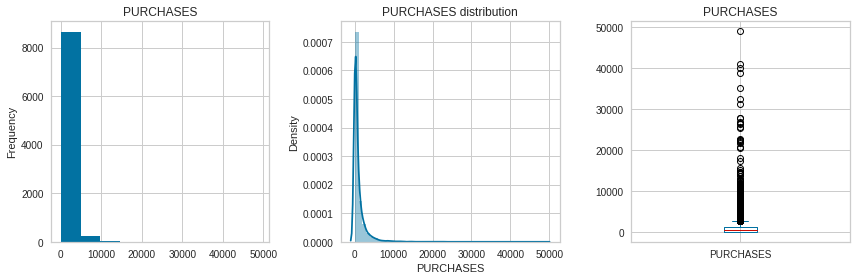

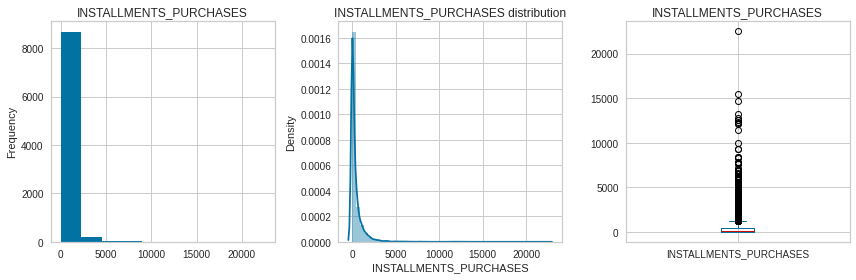

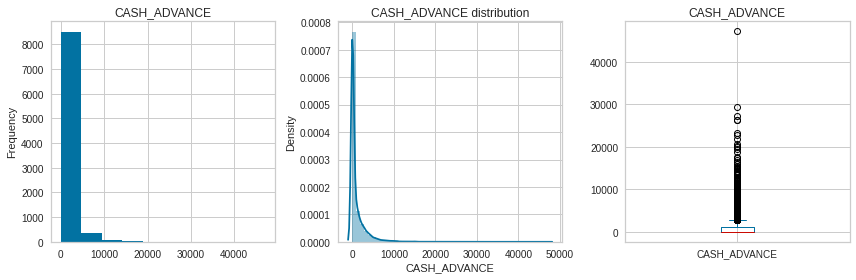

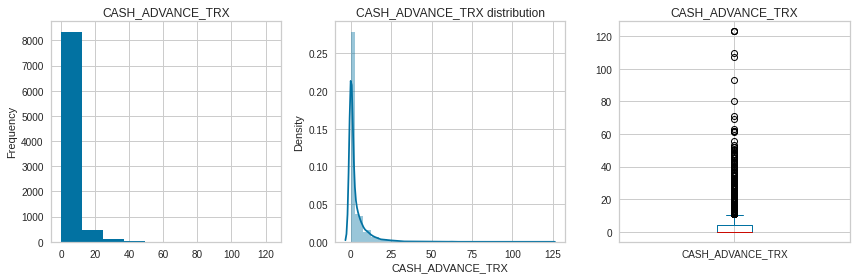

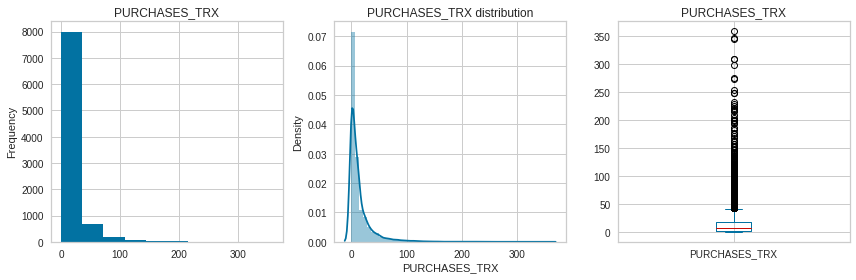

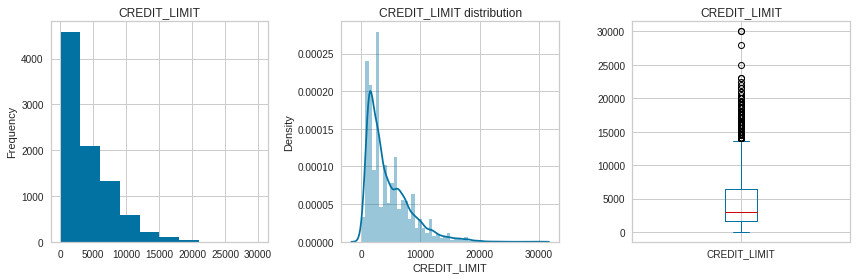

In [44]:
for i in df.columns:
    feat_plot(df[i])

**Interpretasi:**

- Data memiliki skewness ke kanan yang artinya persebarannya tidak normal.
- Rentang skala pada semua features berbeda-beda maka diperlukan scaling data.
- Terdapat banyak outlier pada semua features tetapi kita tidak bisa menghapus features tersebut karena nantinya data terlalu sedikit. Kita akan menggunakan scaling untuk membantu dalam permasalahan outlier.



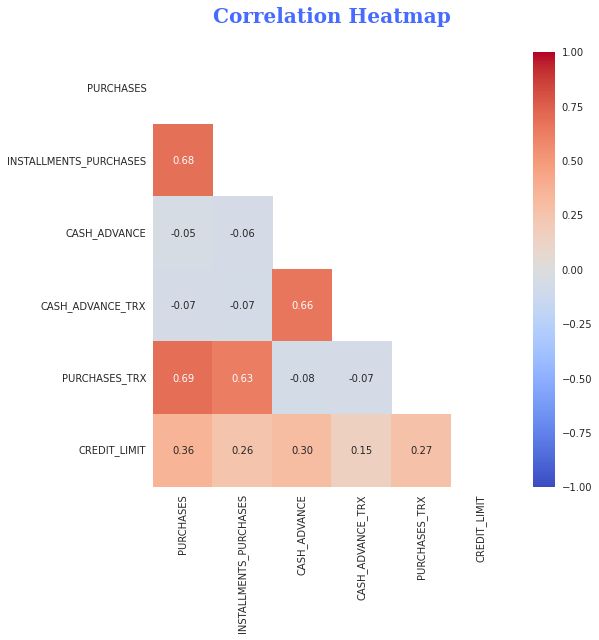

In [45]:
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 20}

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':10}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Correlation Heatmap\n", 
          fontdict=font_title)
plt.show()

In [46]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif['variable']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'yes', 'no')
    return(vif)

In [47]:
calc_vif(df)

,variable,VIF,Acceptable
0,PURCHASES,2.994574,yes
1,INSTALLMENTS_PURCHASES,2.463637,yes
2,CASH_ADVANCE,2.357145,yes
3,CASH_ADVANCE_TRX,2.096070,yes
4,PURCHASES_TRX,2.756577,yes
5,CREDIT_LIMIT,2.036998,yes


Setelah mengecek korelasi dan VIF dari dataset, tidak terdapat adanya multikolinearitas antar fitur.

## **SCALING**

Sebelum dataset discaling, dataset di log transform lalu discaling menggunakan StandardScaler agar dimensi menjadi lebih merata antar fitur.

In [48]:
# Log transformation pada dataset dengan jarak dimensi yang besar

df_log = df.copy()
skewed_features = ['PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                   'CREDIT_LIMIT']

for feature in skewed_features:
    df_log[feature] = np.log(df[feature]+0.000001) 


In [49]:
def plot(data):
    for i,j in zip(df.columns, range(len(df.columns))):

        plt.figure(figsize=(10,3))

        plt.subplot(121)
        sns.distplot(df[i])
        plt.title(i+' sebelum scaling')

        plt.subplot(122)
        sns.distplot(data[j])
        plt.title(i+' setelah scaling')

In [50]:
scaler = StandardScaler()
df_log_scaled = scaler.fit_transform(df_log)

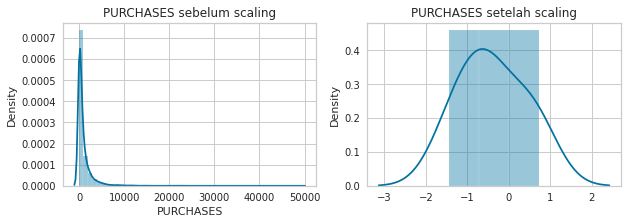

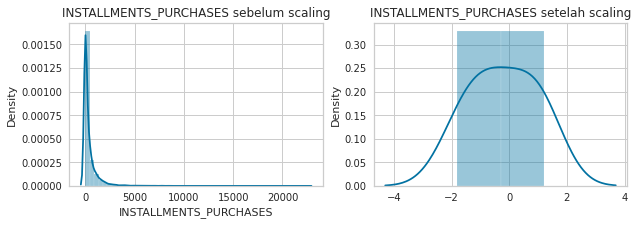

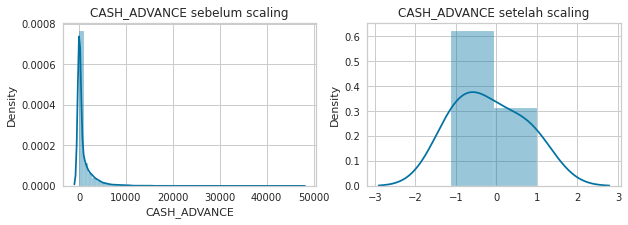

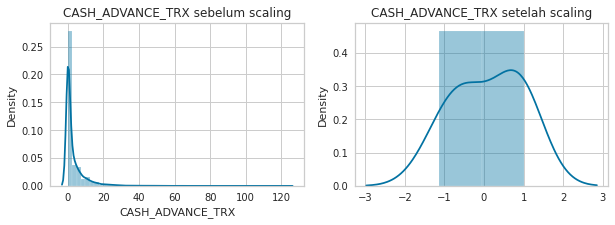

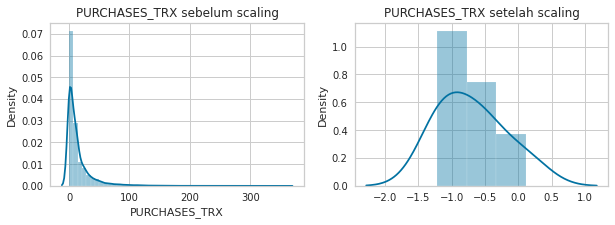

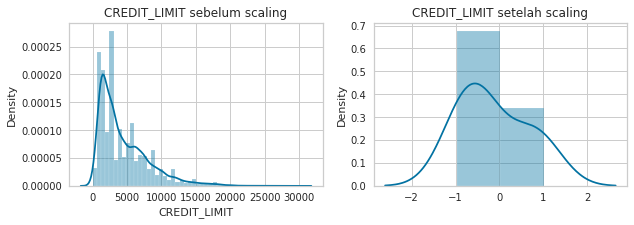

In [51]:
plot(df_log_scaled)

Setelah discaling dan divisualisasikan dengan distplot, grafik garis setiap fitur terdistribusi lebih normal.

In [52]:
# Dataframe baru yang berisi value yang sudah di scaling.
df_log_scaled = pd.DataFrame(df_log_scaled) 
df_log_scaled.columns = df_log.columns 
df_log_scaled.head()

,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT
0,0.329749,0.736520,-0.962098,-0.476083,-0.511381,-1.447169
1,-1.820066,-1.129426,1.213499,0.110032,-0.591841,0.925946
2,0.574574,-1.129426,-0.962098,-0.476083,-0.109082,1.010086
3,0.652038,-1.129426,0.881769,-0.329554,-0.551611,1.010086
4,0.120836,-1.129426,-0.962098,-0.476083,-0.551611,-1.224820


In [53]:
# Mengecek keberadaan missing value.
df_log_scaled.isnull().sum()

PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
dtype: int64

# **K-MEANS CLUSTERING**

**Elbow Method**

In [54]:
# looping fitting Kmeans pada dataframe dengan jumlah cluster 2-9
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(df_log_scaled) for k in range (2, 10)]
kmeans_models 

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0)]

In [55]:
kmeans_models[0].inertia_

35861.713758270875

In [56]:
kmeans_models[1].inertia_

29367.3783085406

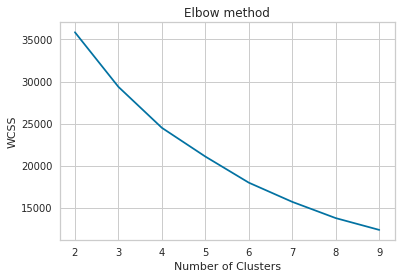

In [57]:
# Within Cluster Sum of Square dari tiap model dengan jumlah cluster berbeda
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(2, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

Dilihat dari grafik elbow method, jumlah cluster yang dipakai belum jelas maka kita akan menggunakan K elbow visualizer dengan metric distortion untuk mencari jumlah cluster.

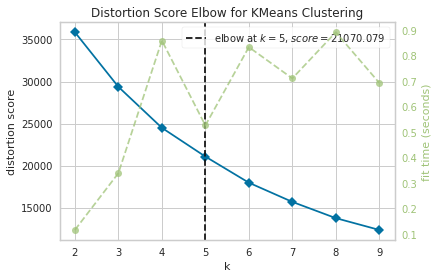

In [58]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_log_scaled)   
visualizer.show()     

Kita akan melakukan pemodelan Kmeans clustering dengan K=5.

In [59]:
# Kmeans dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_log_scaled)

# label yang diberikan pada tiap data point dengan jumlah cluster 5
labels = kmeans.labels_

In [60]:
# hasil KMeans clustering dengan jumlah cluster 5 dimasukkan ke df awal
df['kmeans'] = labels

In [61]:
# Persebaran datapoints di setiap cluster
df['kmeans'].value_counts()

3    3259
4    2045
1    1666
2    1576
0     403
Name: kmeans, dtype: int64

In [62]:
df.head()

,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,kmeans
0,95.40,95.4,0.000000,0,2,1000.0,3
1,0.00,0.0,6442.945483,4,0,7000.0,4
2,773.17,0.0,0.000000,0,12,7500.0,1
3,1499.00,0.0,205.788017,1,1,7500.0,1
4,16.00,0.0,0.000000,0,1,1200.0,1


In [63]:
km_score = silhouette_score(df_log_scaled, df['kmeans'])
km_score

0.3975250476544879

## **AGGLOMERATIVE CLUSTERING**

## **Ward**

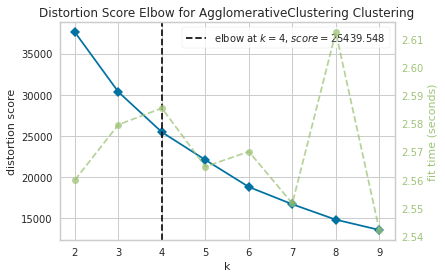

In [64]:
model = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_log_scaled)   
visualizer.show()

## **Complete**

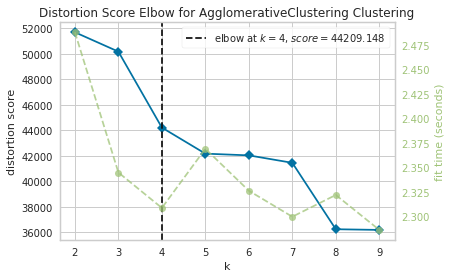

In [65]:
model = AgglomerativeClustering(linkage='complete')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_log_scaled)   
visualizer.show()

## **Average**

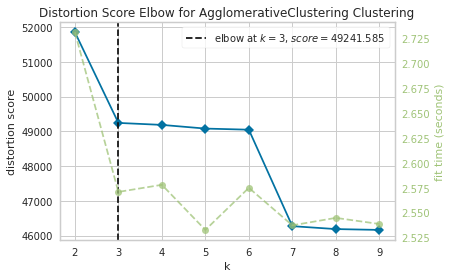

In [67]:
model = AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_log_scaled)   
visualizer.show()

In [68]:
# Hasil Agglomerative clustering dimasukkan kedalam df awal.

agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Ward4'] = agg_ward.fit_predict(df_log_scaled)

agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
df['Complete4'] = agg_complete.fit_predict(df_log_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Average3'] = agg_average.fit_predict(df_log_scaled)

df.head()

,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,kmeans,Ward4,Complete4,Average3
0,95.40,95.4,0.000000,0,2,1000.0,3,1,0,2
1,0.00,0.0,6442.945483,4,0,7000.0,4,2,0,2
2,773.17,0.0,0.000000,0,12,7500.0,1,1,0,2
3,1499.00,0.0,205.788017,1,1,7500.0,1,0,0,2
4,16.00,0.0,0.000000,0,1,1200.0,1,1,0,2


In [69]:
agg_ward = silhouette_score(df_log_scaled, df['Ward4'])
agg_comp = silhouette_score(df_log_scaled, df['Complete4'])
agg_ave = silhouette_score(df_log_scaled, df['Average3'])

## **DBSCAN**

In [70]:
sil = []
score = 0

for eps in [i/10 for i in range(5, 10)]:  
    
    for min_sample in range(7, 15):

        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(df_log_scaled)
        silhouette = silhouette_score(df_log_scaled, labels)
        
        if score < silhouette:
            best_eps = eps
            best_sam = min_sample
            score = silhouette

        print(f'cluster present: {np.unique(labels)}, cluster size: {np.bincount(labels+1)}')
        print(f'    eps = {eps}, min_sample = {min_sample}, silhoutte score: {silhouette}')

        sil.append(silhouette)

print(f'best score: {score}, eps:{best_eps}, min_sample:{best_sam}')

cluster present: [-1  0  1  2  3  4  5  6  7], cluster size: [ 335 3511 1996 1050  732 1303    7    9    6]
    eps = 0.5, min_sample = 7, silhoutte score: 0.3547968827413659
cluster present: [-1  0  1  2  3  4  5  6  7], cluster size: [ 371 3509 1994 1049  725 1271   15    7    8]
    eps = 0.5, min_sample = 8, silhoutte score: 0.3466605446358967
cluster present: [-1  0  1  2  3  4  5], cluster size: [ 410 3504 1993 1048  724 1259   11]
    eps = 0.5, min_sample = 9, silhoutte score: 0.35847131247619163
cluster present: [-1  0  1  2  3  4  5  6  7], cluster size: [ 443 3499 1993 1048  719 1219   10    9    9]
    eps = 0.5, min_sample = 10, silhoutte score: 0.3356608961853099
cluster present: [-1  0  1  2  3  4  5], cluster size: [ 484 3496 1986 1048  712 1213   10]
    eps = 0.5, min_sample = 11, silhoutte score: 0.3584981872219192
cluster present: [-1  0  1  2  3  4], cluster size: [ 498 3496 1985 1046  711 1213]
    eps = 0.5, min_sample = 12, silhoutte score: 0.3853568419617573
cl

In [71]:
# Fit DBScan
dbscan = DBSCAN(eps=0.9, min_samples=12)
clusters_dbs = dbscan.fit_predict(df_log_scaled)

In [72]:
db_score = silhouette_score(df_log_scaled, clusters_dbs)

In [73]:
df['dbscan'] = dbscan.labels_

In [74]:
# Persebaran datapoints menggunakan DBSCAN clustering
df['dbscan'].value_counts()

 0    3532
 1    2019
 4    1409
 2    1063
 3     787
-1     139
Name: dbscan, dtype: int64

## **SUMMARY AND CONCLUSION**



Setelah melakukan pemodelan pada 3 tipe clustering (KMeans, Agglomerative/Hierarchical dan DBSCAN), kita akan membandingkan nilai silhouette score yang diperoleh dengan membuat sebuah dataframe baru.

In [75]:
scores = [km_score, agg_ward, agg_comp, agg_ave, db_score]
models = ['KMeans', 'Agg ward', 'Agg complete', 'Agg average', 'DBScan']
clusters = [5,4,4,3,5]
list_1 = list(zip(models, clusters, scores))

summary = pd.DataFrame(list_1, columns = ['Model', 'No of Cluster', 'Silhouette Score'])
summary

,Model,No of Cluster,Silhouette Score
0,KMeans,5,0.397525
1,Agg ward,4,0.381672
2,Agg complete,4,0.243532
3,Agg average,3,0.676148
4,DBScan,5,0.391648


In [76]:
# Visualisasi hasil silhouette score tertinggi menggunakan 2 components PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(df_log_scaled)

In [77]:
pca_df = pd.DataFrame(data=X, columns=['PCA1','PCA2'])
pca_df['labels']= df['Average3']
pca_df.head()

,PCA1,PCA2,labels
0,-0.867458,-1.559281,2.0
1,2.298042,0.453366,2.0
2,-0.385393,-0.096562,2.0
3,0.668491,0.395880,2.0
4,0.173711,-1.735731,2.0


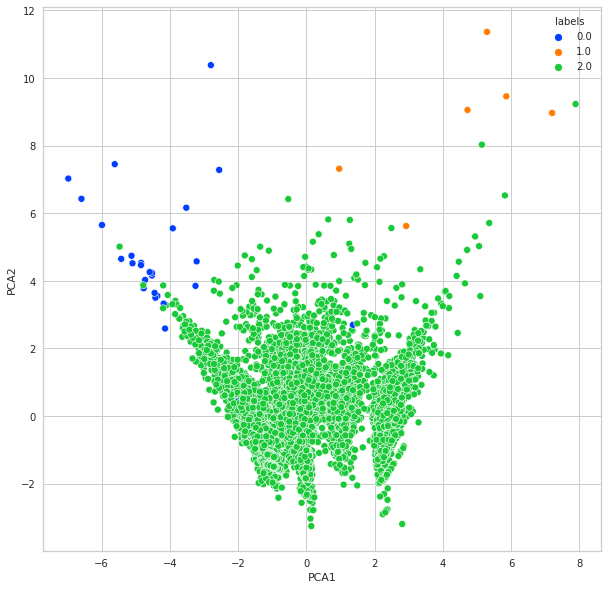

In [78]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='labels', data=pca_df, palette='bright')

Berdasarkan tabel diatas, nilai silhouette score yang tertinggi diperoleh dengan model Agglomerative clustering dengan linkage average dan dengan 3 cluster. Tetapi setelah divisualisasikan, persebaran data tidak seimbang dan lebih dominan pada cluster 2 (warna hijau).


Maka kita memutuskan untuk menggunakan model KMeans dengan alasan:

1. Jumlah pengguna kartu kredit yang bisa disegmentasikan dengan akurat lebih banyak dihasilkan oleh KMeans sehingga lebih bisa menjawab problem statement.
2. Clustering yang dihasilkan oleh KMeans lebih bisa diinterpretasi dan lebih seimbang.
3. Silhouette score tertinggi kedua setelah Agglomerative clustering dengan linkage average.

In [79]:
pca_df_2 = pd.DataFrame(data=X, columns=['PCA1','PCA2'])
pca_df_2['labels']= df['kmeans']
pca_df_2.head()

,PCA1,PCA2,labels
0,-0.867458,-1.559281,3.0
1,2.298042,0.453366,4.0
2,-0.385393,-0.096562,1.0
3,0.668491,0.395880,1.0
4,0.173711,-1.735731,1.0


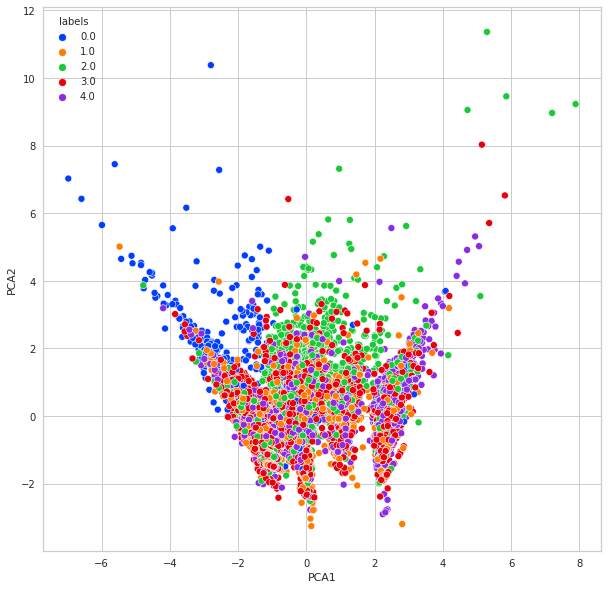

In [80]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='labels', data=pca_df_2, palette='bright')


Visualisasi menggunakan PCA 2 components untuk hasil clustering dengan Kmeans. Jarak antar datapoints masih cukup dekat dan overlapping, ini dikarenakan nilai silhouette score yang cukup rendah.

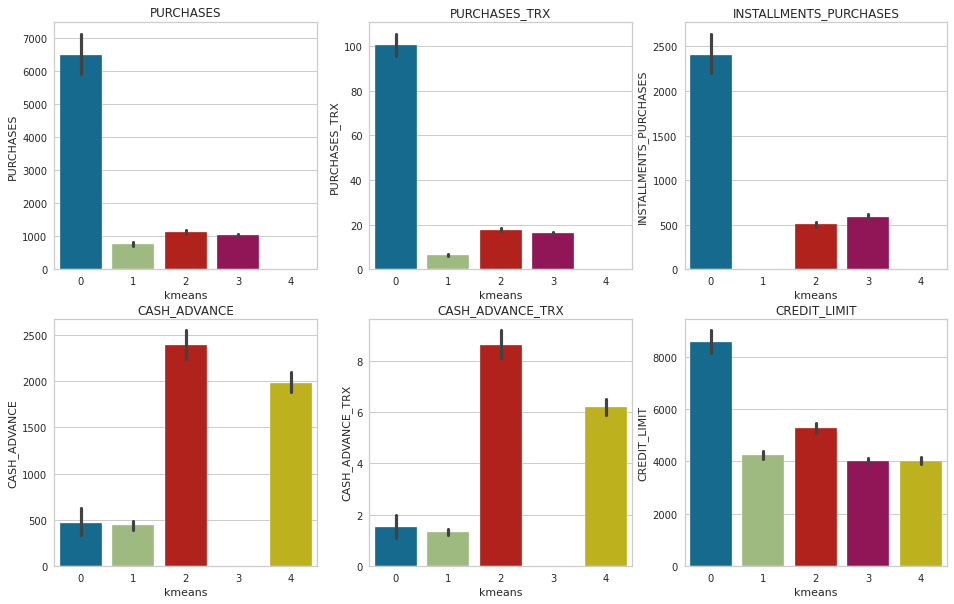

In [81]:
sum_of_columns = df[['PURCHASES', 'PURCHASES_TRX', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT']]
fig = plt.figure(figsize=(16,10))
a = 0; b = 0
plt.tight_layout()

for i in sum_of_columns[0:7]:
    axes = plt.subplot2grid((2,3),(a,b))
    sns.barplot(x = df['kmeans'],y = df[i], ax = axes)
    axes.set_title(i)
    axes.yaxis.grid(True)
    axes.set_xlabel('kmeans')
    b = b+1
    if b>=3:
        b = 0
        a = a+1

In [82]:
# Hasil clustering KMeans dengan value masing-masing fitur.

df_kmeans = df.drop(['Ward4', 'Complete4', 'Average3', 'dbscan'], axis =1)
pd.set_option("display.max_columns", None)
df_kmeans.groupby('kmeans').describe()

PURCHASES                                                        \
           count         mean          std     min        25%      50%   
kmeans                                                                   
0          403.0  6489.300744  6202.170699  451.01  3140.2050  4877.66   
1         1666.0   757.699052  1235.696325    0.01   129.0000   370.00   
2         1576.0  1122.248052  1321.592678    0.00   310.5675   675.37   
3         3259.0  1022.553986  1332.502512    4.80   256.5000   562.50   
4         2045.0     0.001012     0.044241    0.00     0.0000     0.00   

                            INSTALLMENTS_PURCHASES                            \
              75%       max                  count         mean          std   
kmeans                                                                         
0       7467.1400  49039.57                  403.0  2407.833846  2328.801039   
1        925.7800  17945.00                 1666.0     0.000000     0.000000   
2       1489.2575  22101.78                 1576.0   504.691643   612.244325   
3       1342.8500  26784.62                 3259.0   587.056582   821.643431   
4          0.0000      2.00                 2045.0     0.042518     1.544925   

                                                     CASH_ADVANCE  \
         min       25%      50%        75%       max        count   
kmeans                                                              
0       0.00  1033.675  1689.16  2947.5650  15497.19        403.0   
1       0.00     0.000     0.00     0.0000      0.00       1666.0   
2       0.00    99.975   301.05   691.1675   5059.29       1576.0   
3       1.95   170.010   365.15   723.2500  22500.00       3259.0   
4       0.00     0.000     0.00     0.0000     66.95       2045.0   

                                                                      \
               mean          std        min         25%          50%   
kmeans                                                                 
0        467.907752  1453.331840   0.000000    0.000000     0.000000   
1        440.610571  1030.932018   0.000000    0.000000     0.000000   
2       2395.465260  3128.632017  14.222216  499.547807  1403.612558   
3          0.000000     0.000000   0.000000    0.000000     0.000000   
4       1986.715070  2460.266531   0.000000  379.770302  1204.068667   

                                 CASH_ADVANCE_TRX                            \
                75%          max            count      mean        std  min   
kmeans                                                                        
0          0.000000  15133.53213            403.0  1.503722   4.658685  0.0   
1        345.372635  10239.08859           1666.0  1.314526   2.311115  0.0   
2       3186.168613  47137.21176           1576.0  8.638325  10.831109  1.0   
3          0.000000      0.00000           3259.0  0.000000   0.000000  0.0   
4       2705.839993  26194.04954           2045.0  6.193643   7.304039  0.0   

                              PURCHASES_TRX                               \
        25%  50%   75%    max         count        mean        std   min   
kmeans                                                                     
0       0.0  0.0   0.0   48.0         403.0  100.516129  49.383479  49.0   
1       0.0  0.0   2.0   13.0        1666.0    6.407563   7.938210   0.0   
2       2.0  5.0  12.0  123.0        1576.0   17.745558  15.631571   0.0   
3       0.0  0.0   0.0    0.0        3259.0   16.107702  12.561564   0.0   
4       2.0  4.0   8.0   80.0        2045.0    0.003912   0.069836   0.0   

                                 CREDIT_LIMIT                            \
         25%   50%    75%    max        count         mean          std   
kmeans                                                                    
0       69.0  85.0  111.5  358.0        403.0  8575.434243  4493.618139   
1        1.0   3.0    9.0   60.0       1666.0  4251.041508  3445.557463   
2        6.0  12.0   25.0 

**Penjelasan dan Rekomendasi per Cluster:** 

<br>

**Cluster 0:**


*   Paling sering melakukan transaksi pembelian(purchases_trx) dan cicilan(installent_purchases) menggunakan kartu kredit dibandingkan cluster lain.
*   Mempunyai batas kredit(credit_limit) yang paling tinggi dibandingkan cluster lain.
*   Jarang melakukan penarikkan tunai(cash_advance). 

Rekomendasi:


*   Bank harus memberikan pelayanan yang baik pada cluster ini dan dijaga agar mereka tetap menggunakan kartu kredit dari bank.
*   Bank bisa memberikan skema diskon terhadap barang-barang mewah yang biasanya menggunakan cicilan.
*   Cluster memiliki kapasitas kebiasaan berbelanja dan karena sudah menggunakan kartu kredit untuk belanja, maka kami dapat menggunakan kebiasaan berbelanja mereka untuk mengoptimalkan strategi agar mereka membelanjakan produk-produk lebih banyak lagi 

<br> 

**Cluster 1:**


*   Cluster ini memiliki jumlah customer terbanyak.
*   Jarang melakukan pembelian(purchases_trx). 
*   Tidak pernah melakukan transaksi menggunakan cicilan kartu kredit(installments_purchases). 
*   Jarang melakukan penarikkan tunai(cash_advance). 

Rekomendasi:


*   Bank bisa memberikan skema diskon atau promosi dengan pembayaran menggunakan kartu kredit terhadap barang-barang harian agar penggunaan kartu kredit meningkat.
*   Memberikan informasi keuntungan cicilan(contoh: bunga 0%) kepada customer di cluster ini bisa mendorong mereka untuk mulai bertransaksi menggunakan cicilan.

<br>

**Cluster 2:**


*   Penggunaan kartu kredit lebih digunakan untuk penarikkan tunai (cash_advance).
*   Jarang melakukan pembelian(purchases_trx) dan cicilan(installent_purchases) menggunakan kartu kredit.
*   Mempunyai nilai batas kredit(credit_limit) diatas rata-rata.

Rekomendasi:


*   Bank bisa memberikan skema diskon atau promosi dengan pembayaran menggunakan kartu kredit terhadap barang-barang harian agar penggunaan kartu kredit meningkat.

<br>

**Cluster 3:**


*   Tidak pernah melakukan penarikkan tunai (cash_advance).
*   Mempunyai nilai batas kredit(credit_limit) rata-rata.
*   Lebih sering melakukan cicilan (installments_purchases) dibandingkan cluster 1,2 dan 4.

Rekomendasi:

*   Cluster ini sudah memiliki keseimbangan dalam berbelanja tetapi tidak membeli produk sebanyak itu, dengan dorongan seperti memberikan diskon yang tepat terhadap produk-produk yang sering mereka belanjakan, kita mungkin bisa membuat mereka menggunakan kartu kredit untuk belanja dan menjadikan sumber pendapatan untuk bank. 

<br>

**Cluster 4:**


*   Penggunaan kartu kredit hampir seluruhnya untuk penarikkan tunai (cash_advance).
*   Kebanyakan customer jarang bahkan tidak pernah melakukan pembelian dan cicilan dengan kartu kredit.
*   Mempunyai nilai batas kredit(credit_limit) rata-rata.


Rekomendasi:

*   Cluster ini mempunyai perilaku penggunaan kartu kredit yang mirip dengan cluster 2, maka bank juga bisa mendorong customer untuk memulai membayar transaksi menggunakan kartu kredit serta cicilan dengan cara memberikan penawaran atau promosi untuk pembelian pertama kali.


